In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset

In [3]:
data = pd.read_csv('Titanic-Dataset.csv')
data_copy = data.drop(columns=['PassengerId'], axis=1)
data_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
for i in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']:
    print(data[[i, 'Survived']].groupby(i, as_index=False).mean().sort_values(by='Survived', ascending=False))
    print('-'*10, '\n')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
81  65.00       0.0
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0

[88 rows x 2 columns]
---------- 

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
---------- 



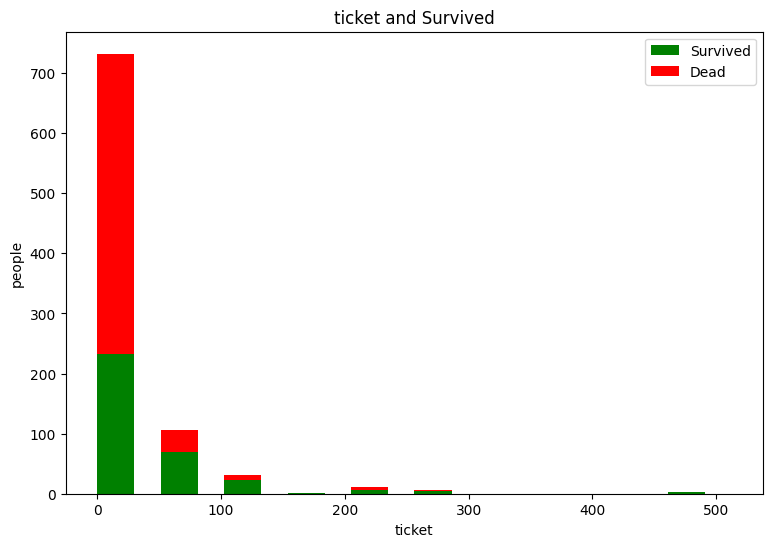

In [16]:
plt.figure(figsize=(9, 6))
plt.hist(x=[data_copy[data_copy['Survived']==1]['Fare'], 
            data_copy[data_copy['Survived']==0]['Fare']],
            stacked=True, color=['g','r'], label = ['Survived', 'Dead'], width=30)
plt.title('ticket and Survived')
plt.xlabel('ticket')
plt.ylabel('people')
plt.legend()
plt.show()